# Overview

### Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.



Has the network latency gone up since we switched internet service providers?


Null Hypothesis (H0): The new internet service provider has no effect in the network's latency increase
Alternative Hypothesis (Ha): The new internet service provider has effect the network's latency increase
    
                            Lantency Exists   Lantency doesn't exist
Lantency was observed      # True positve   / # Type II error

Lantency was not observed  # Type I error   / # True negative


True Positive: If the study correctly detects that the new internet service provider has increased the network's latency, it would be a true positive.

True Negative: If the study correctly concludes that the new internet service provider has no effect on the network's latency, it would be a true negative.

Type I Error: If the study concludes that the new internet service provider has increased the network's latency when it actually hasn't, it would be a type I error. This is also known as a false positive.

Type II Error: If the study concludes that the new internet service provider has no effect on the network's latency when it actually has, it would be a type II error. This is also known as a false negative.



Is the website redesign any good?


Null Hypothesis (H0): There is no difference in the popularity of the redesign website compare to the old one. 
Alternative Hypothesis (Ha): There is a diference in popularity of the redesign website compare to the old one.

    
                              Popularity Exists   Popularity doesn't exist
difference was observed       # True positve     / # Type II error

difference was not observed   # Type I error     / # True negative

Is our television ad driving more sales?

Null Hypothesis (H0): The television ad is not driving more sales
Alternative Hypothesis (Ha): The television as is driving more sales

                                    More Sales Exists   More Sales don't exist
ad increased sales was observed      # True positve       / # Type II error

No increase in sales observed        # Type I error       / # True negative

# Comparison of Means


### 1. Answer with the type of test you would use (assume normal distribution):

    Is there a difference in grades of students on the second floor compared to grades of all students?

        * One sample test / two tails

    Are adults who drink milk taller than adults who dont drink milk?


        * Independent t-test (two sample) / one tail 

    Is the the price of gas higher in texas or in new mexico?

        * Independent t-test (two sample) / one tail

    Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

        * ANOVA / two tail

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
    A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.
    
    A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
    
    Use a .05 level of significance.

In [2]:
import sys
sys.path.append('../../codeup-data-science') #setting path to env
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from pydataset import data

In [3]:
from env import get_db_url

In [4]:
office_one_sample_size = 40
office_one_mean = 90
office_one_sd = 15
office_two_sample_size = 50
office_two_mean = 100
office_two_sd = 20
a = .05

$H_{0}$ : There is no difference in the average time it takes to sell homes between office #1 and #2. 

$H_{a}$ : There is difference in the average time it takes to sell homes between office #1 and #2. 

In [5]:
# office_one_sample = 40
office_one_rnd_sample = np.random.normal(0, 1, office_one_sample_size)
office_one_rnd_sample

array([-0.36186341,  0.68116653,  0.11671683, -1.53478685, -1.39840346,
       -1.06643057, -1.35277495, -0.7448914 , -0.48854401,  0.6159017 ,
        0.70814959,  0.20799618, -0.96730168,  0.18308538, -0.58180164,
        0.34627319,  1.04094403, -1.47588467, -1.23726363,  1.2080092 ,
       -0.22431397, -0.35618723, -0.44429455,  0.07456683, -0.42995832,
        1.33444833,  1.104407  ,  2.03356843,  0.28045664, -1.69761837,
       -0.65033735,  0.26975902, -0.05413667, -1.60048656, -2.4863447 ,
       -0.63375388,  0.8132182 , -1.53380024,  0.28167186, -0.45329018])

In [6]:
office_one_sample = office_one_rnd_sample * office_one_mean + office_one_sd
office_one_sample

array([ -17.56770694,   76.30498762,   25.5045147 , -123.13081684,
       -110.85631128,  -80.97875104, -106.7497453 ,  -52.04022592,
        -28.96896134,   70.43115316,   78.73346267,   33.7196562 ,
        -72.05715137,   31.47768452,  -37.36214739,   46.16458726,
        108.68496278, -117.82962065,  -96.3537268 ,  123.72082795,
         -5.18825772,  -17.05685051,  -24.98650917,   21.71101435,
        -23.69624899,  135.10034978,  114.39663025,  198.02115903,
         40.24109718, -137.78565325,  -43.53036143,   39.27831213,
         10.12769931, -129.04379022, -208.77102291,  -42.03784884,
         88.18963756, -123.04202182,   40.35046782,  -25.79611629])

In [7]:
df_office_one_sample = pd.DataFrame(office_one_sample)
df_office_one_sample.head()

,0
0,-17.567707
1,76.304988
2,25.504515
3,-123.130817
4,-110.856311


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

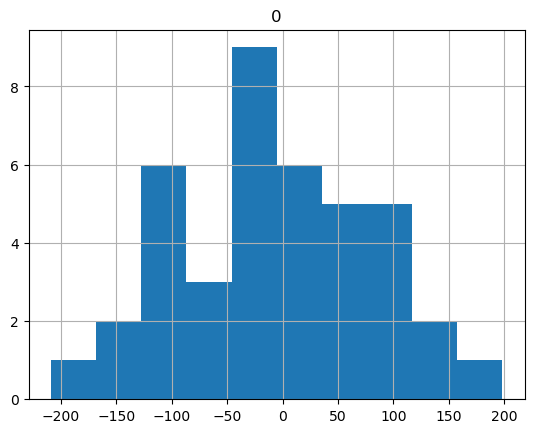

In [8]:
df_office_one_sample.hist()

In [9]:
df_office_one_sample.var()

0    7922.470226
dtype: float64

In [10]:
# office_two_sample = 50
office_two_rnd_sample = np.random.normal(0, 1, office_two_sample_size)
office_two_rnd_sample

array([ 0.23966366,  0.93732724,  2.59114727, -0.64785494, -1.59105025,
        0.25996588, -2.275237  , -0.25272818, -0.27012606,  1.56663666,
        2.63630182, -0.14022779,  0.49600347, -0.18048644, -0.35542981,
       -1.6292072 , -0.36665101, -0.25079505,  0.11876613, -0.46494313,
       -0.81808091, -1.11593015,  0.4007781 ,  0.83022451, -0.63058097,
        1.42475939, -0.73170691,  1.66842426,  0.08804046, -1.66384998,
        0.59176261, -0.38954485,  0.8348354 ,  0.36623248,  0.43364283,
       -0.01858766, -0.92443572, -0.98867138, -1.95166651, -1.36200213,
       -0.78988551, -0.09326447, -0.21591931,  0.33571211,  0.13455717,
       -1.98120046,  0.50780571, -1.38732064,  1.34509075,  0.74229392])

In [11]:
office_two_sample = office_two_rnd_sample * office_two_mean + office_two_sd
office_two_sample

array([  43.96636588,  113.7327235 ,  279.11472662,  -44.7854935 ,
       -139.10502465,   45.9965883 , -207.52370018,   -5.27281781,
         -7.01260583,  176.66366581,  283.63018182,    5.97722055,
         69.60034703,    1.95135628,  -15.54298113, -142.92072017,
        -16.66510082,   -5.07950499,   31.8766128 ,  -26.49431274,
        -61.80809074,  -91.59301511,   60.07781034,  103.0224507 ,
        -43.05809745,  162.47593945,  -53.17069137,  186.84242598,
         28.80404611, -146.3849977 ,   79.17626141,  -18.95448467,
        103.48354044,   56.62324761,   63.36428284,   18.14123392,
        -72.4435717 ,  -78.86713776, -175.16665066, -116.20021301,
        -58.98855073,   10.67355344,   -1.59193145,   53.57121067,
         33.45571704, -178.12004623,   70.78057052, -118.7320645 ,
        154.50907535,   94.22939244])

In [12]:
df_office_two_sample = pd.DataFrame(office_two_sample)
df_office_two_sample.head()

,0
0,43.966366
1,113.732724
2,279.114727
3,-44.785494
4,-139.105025


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

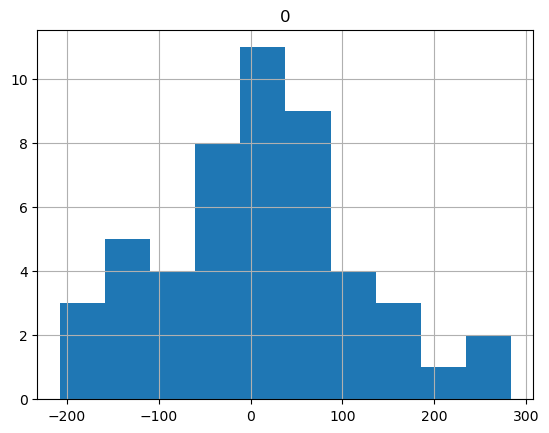

In [13]:
df_office_two_sample.hist()

In [14]:
office_one_sample.var(), office_two_sample.var()

(7724.408470773417, 11597.688311469603)

In [15]:
stat, p_val = stats.levene(office_one_sample, office_two_sample)
stat, p_val

(0.7523920891535468, 0.38807909567179544)

In [16]:
t, p = stats.ttest_ind(office_one_sample, office_two_sample, equal_var=False)
t, p

(-0.8964695606490747, 0.37244941186875)

In [17]:
print("is p/2 < alpha? ", p / 2 < a)
print("is t > 0? ", t > 0)

is p/2 < alpha?  False
is t > 0?  False


In [18]:
if p / 2 > a:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


#### t-test from stats (Only works if you have the mean, sigma and the number of random samples)

In [19]:
stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

### 3. Load the mpg dataset and use it to answer the following questions:


    Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


         * Two tail, two sample
         
             $H_{0}$ : There is no difference in FR in cars from 2008 vs 1999

             $H_{a}$ : There is difference in FR in cars from 2008 vs 1999
      

In [20]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [21]:
mpg['mileage_difference'] = mpg['hwy'] - mpg['cty']
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


In [22]:
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']], axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,19.809524


In [23]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

In [24]:
fe_2008.head()

3     24.313725
4     24.705882
7     21.600000
10    23.333333
11    22.304348
Name: avg_fe, dtype: float64

In [25]:
fe_1999.head()

1    22.212766
2    24.360000
5    19.809524
6    21.272727
8    21.272727
Name: avg_fe, dtype: float64

<AxesSubplot:>

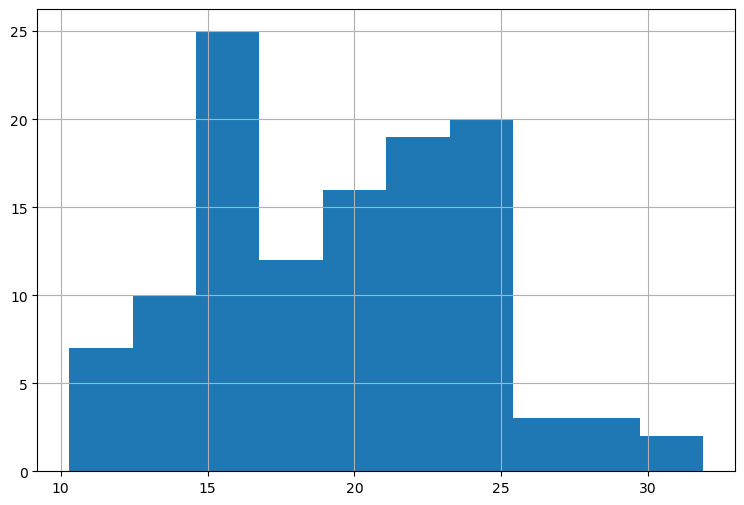

In [26]:
plt.figure(figsize=(9,6))
fe_2008.hist()

<AxesSubplot:>

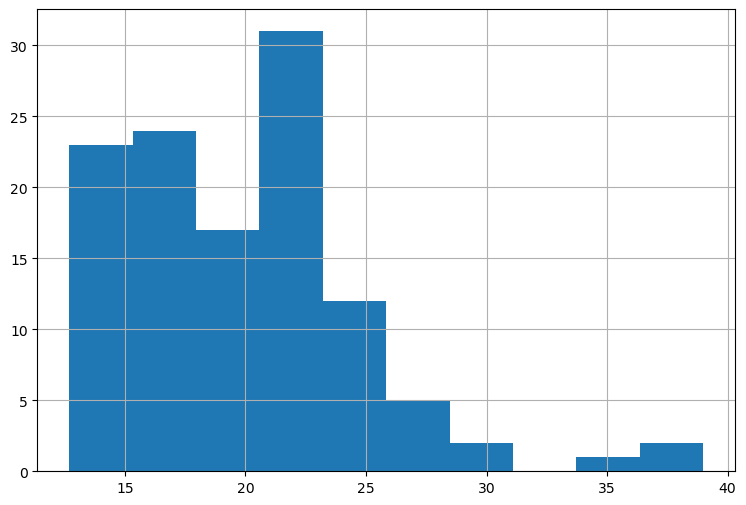

In [27]:
plt.figure(figsize=(9,6))
fe_1999.hist()

In [28]:
stats.levene(fe_2008, fe_1999)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [29]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [30]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')
    

We fail to reject the null hypothesis


In [31]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

    Are compact cars more fuel-efficient than the average car?


         * One tail, one sample
         
             $H_{0}$ : There is no dirrence in fe between compact cars vs average cars.

             $H_{a}$ : There is a difference in fe between compact cars vs average cars.
      

In [32]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe

In [33]:
μ = mpg.avg_fe.mean()

In [34]:
μ

19.585525317633177

<AxesSubplot:>

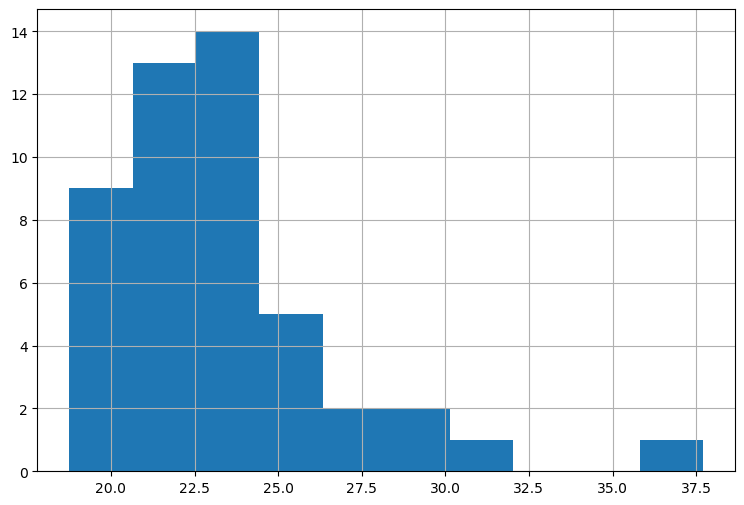

In [35]:
plt.figure(figsize=(9,6))
fe_compact.hist()

<AxesSubplot:>

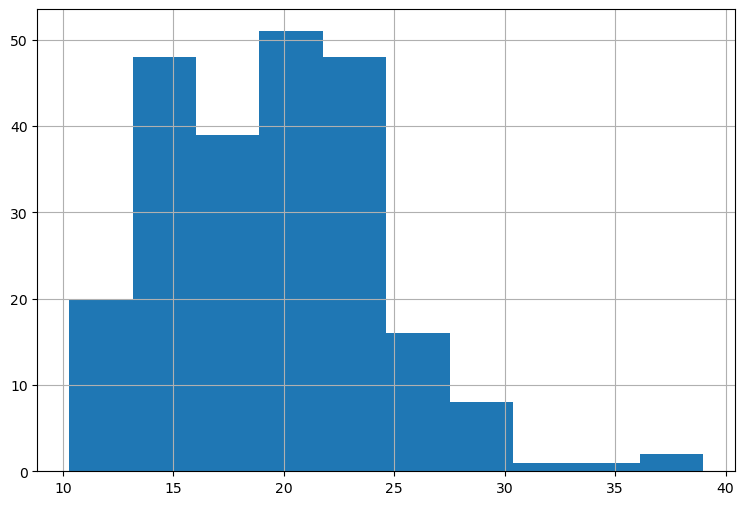

In [36]:
plt.figure(figsize=(9,6))
mpg.avg_fe.hist()

In [37]:
t, p = stats.ttest_1samp(fe_compact, μ)
t, p/2

(7.512360093161354, 7.808833174403837e-10)

In [38]:
fe_compact.mean()

23.500416808701296

In [39]:
mpg.avg_fe.mean()

19.585525317633177

In [40]:
if ((p/2) < a) and (t > 0):
    print('we reject the null hypothesis')
else: 
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


    Do manual cars get better gas mileage than automatic cars?

     * One tail, two sample

         $H_{0}$ : There is no dirrence in gas mileage between manual cars and automatic cars.

         $H_{a}$ : There is a difference in gas mileage between manual cars and automatic cars.

In [41]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [42]:
fe_auto.head()

1    22.212766
4    24.705882
5    19.809524
7    21.600000
9    19.512195
Name: avg_fe, dtype: float64

In [43]:
fe_manual.head()

2     24.360000
3     24.313725
6     21.272727
8     21.272727
10    23.333333
Name: avg_fe, dtype: float64

<AxesSubplot:>

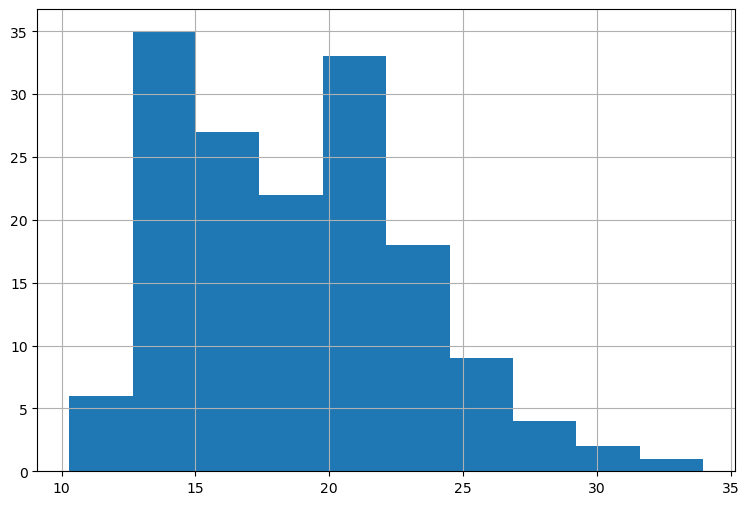

In [44]:
plt.figure(figsize=(9,6))
fe_auto.hist()

<AxesSubplot:>

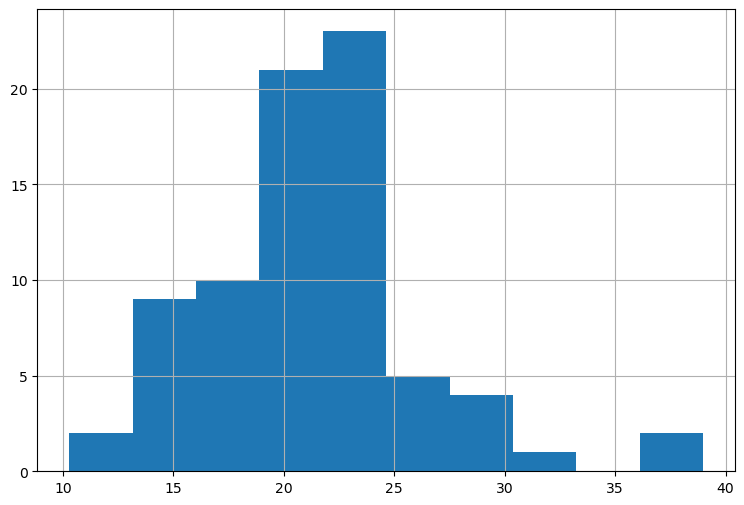

In [45]:
plt.figure(figsize=(9,6))
fe_manual.hist()

In [46]:
stats.levene(fe_auto, fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [47]:
t, p = stats.ttest_ind(fe_manual, fe_auto)

In [48]:
# manual cars give better gas mailage than auto cars
# because t is positive. 
t, p/2 

(4.652577547151351, 2.7552323050220043e-06)

In [49]:
mpg['transmission_type'] = np.where 

# Correlation

## Exercises
Continue working in your hypothesis_testing notebook.

### 1. Answer with the type of stats test you would use (assume normal distribution):

    Is there a relationship between the length of your arm and the length of your foot?

        Pearson'r Correlation Coefficient or Spearman's rho
            - Var.1 = Len(arm)
            - Var.2 = Len(foot)
            

    Do guys and gals quit their jobs at the same rate?

        Two-sample / two tail
            - Var.1 = gender
            - Var.2 = rate of quitting

    Does the length of time of the lecture correlate with a students grade?

        Pearson/Spearman's Correlation Coefficient
            - Var.1 = Len(lecture) - continuous
            - Var.2 - student grade - **continuous if numerical** or discrete if letter grade
        

### 2. Use the telco_churn data.

In [1]:
import sys
sys.path.append('../../codeup-data-science') #setting path to env
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from pydataset import data
from env import get_db_url

In [ ]:
url = get_db_url('telco_churn')

query = '''
show tables
'''

In [ ]:
pd.read_sql(query, url)

In [ ]:
query = '''
select * from customer_payments
'''
customer_payments = pd.read_sql(query, url)
customer_payments.head()

In [ ]:
query = '''
select * from customers
'''
customers = pd.read_sql(query, url)
customers.head()

In [6]:
query = '''
select cp.monthly_charges, tenure
from customer_payments cp
    join customers c using(customer_id)
'''
df = pd.read_sql(query, url)
df.head()

,monthly_charges,tenure
0,65.6,9
1,59.9,9
2,73.9,4
3,98.0,13
4,83.9,3


     * Pearson Correlation Coefficient

         $H_{0}$ : There is no correlation between tenure and monthly charges.

         $H_{a}$ : There is a correlation between tenure and monthly charges.

    Does tenure correlate with monthly charges?


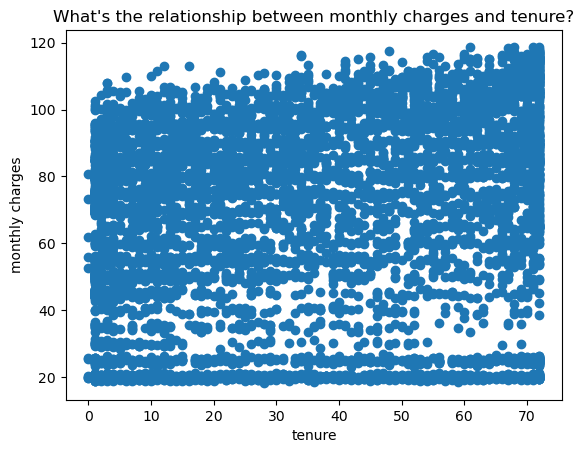

In [7]:
#plot our variables

plt.scatter( df.tenure, df.monthly_charges)

plt.title("What's the relationship between monthly charges and tenure?")
plt.xlabel('tenure')
plt.ylabel('monthly charges')
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

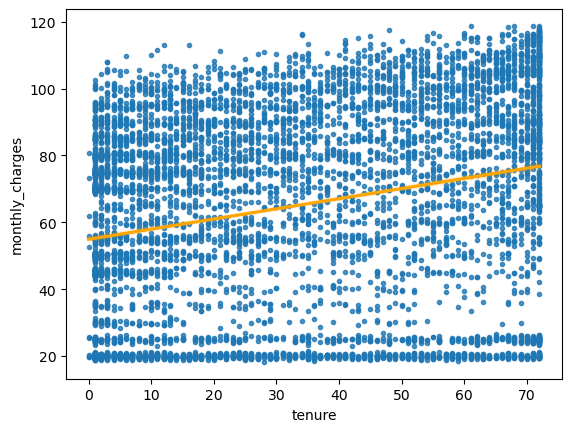

In [8]:
sns.regplot(data=df, y='monthly_charges', x='tenure', marker='.', line_kws={'color': 'orange'})

<AxesSubplot:>

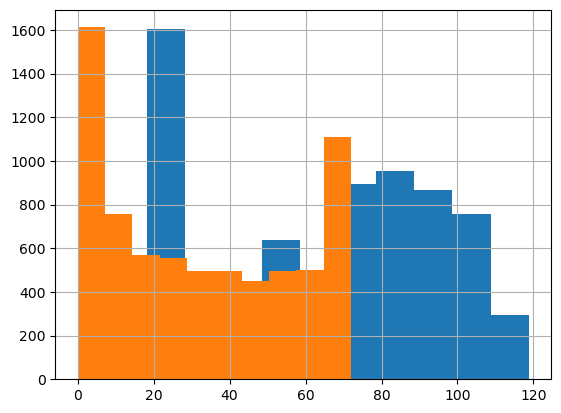

In [9]:
df.monthly_charges.hist()
df.tenure.hist()

In [10]:
def eval_dist(r, p, a=.05):
    if p > a:
        return print (f"""The data is normally distributed""")
    else: 
        return print(f"""The data is Not normally distributed""")

In [11]:
# Use a Shapiro Test to confirm normalcy
from scipy.stats import shapiro

In [12]:
r, p = stats.shapiro(df.monthly_charges)
r, p

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9208889007568359, 0.0)

In [13]:
eval_dist(r, p)

The data is Not normally distributed


### Now that we know that the data is NOT normally distributed we will use the Spearman test

In [14]:
sr, sp = stats.spearmanr(df.tenure, df.monthly_charges)
sr, sp

(0.27641678933130215, 1.0271266876409408e-123)

In [15]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)
r, p

(0.24789985628615246, 4.094044991483017e-99)

In [16]:
def eval_Presult(r, p, α=0.05):
    if p < α:
        return print(f"""We reject H₀, there is a linear relationship with a Correlation Coefficient of {r:2f}.
P-value: {p}""")
    else:
        return print(f"""We fail to reject H₀: that there is a linear relationship.
Pearson’s r: {r:2f}
P-value: {p}""")

In [17]:
def eval_Sresult(r, p, α=0.05):
    if p < α:
        return print(f"""We reject H₀, there is a monotonic relationship.
Spearman’s r: {r:2f}
P-value: {p}""")
    else:
        return print(f"""We fail to reject H₀: that there is a monotonic relationship.
Spearman’s r: {r:2f}
P-value: {p}""")

In [18]:
eval_Presult(r, p)

We reject H₀, there is a linear relationship with a Correlation Coefficient of 0.247900.
P-value: 4.094044991483017e-99


In [19]:
eval_Sresult(sr, sp)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.276417
P-value: 1.0271266876409408e-123


In [20]:
#output results
print('r =', r)
print('p =', p)

r = 0.24789985628615246
p = 4.094044991483017e-99


In [21]:
a = .05

In [22]:
#evaluate p-value
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


    we reject the null hypothesis that says there is no linear relationship between tenure and monthly charges.

    therefore, we are impling there IS a weak positive linear relationship between tenure and monthly charges.
    

    Total charges?

         $H_{0}$ : There is no correlation between tenure, and total charges.

         $H_{a}$ : There is a correlation between tenure, and total charges.

In [23]:
query = '''
select cp.monthly_charges, tenure, cp.total_charges
from customer_payments cp
    join customers c using(customer_id)
'''
df = pd.read_sql(query, url)
df.head()

,monthly_charges,tenure,total_charges
0,65.6,9,593.3
1,59.9,9,542.4
2,73.9,4,280.85
3,98.0,13,1237.85
4,83.9,3,267.4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
 2   total_charges    7043 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 165.2+ KB


In [25]:
# df['total_charges'] = df['total_charges'].astype(float)
# df['total_charges'] = pd.to_numeric(df['total_charges'].fillna('0'), errors='coerce')
df['total_charges'] = df['total_charges'].str.replace(' ', '0').astype('float')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
 2   total_charges    7043 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

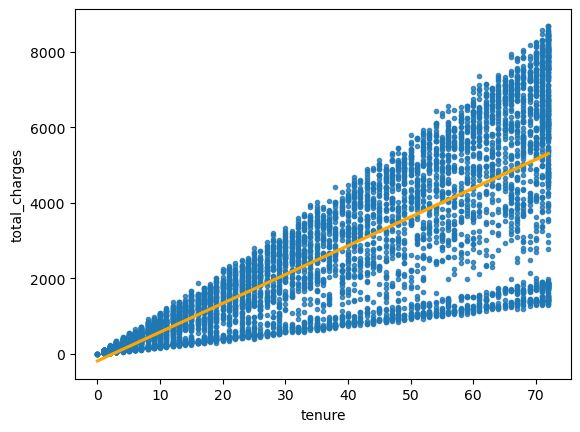

In [27]:
sns.regplot(data=df, y='total_charges', x='tenure', marker='.', line_kws={'color': 'orange'})

<AxesSubplot:>

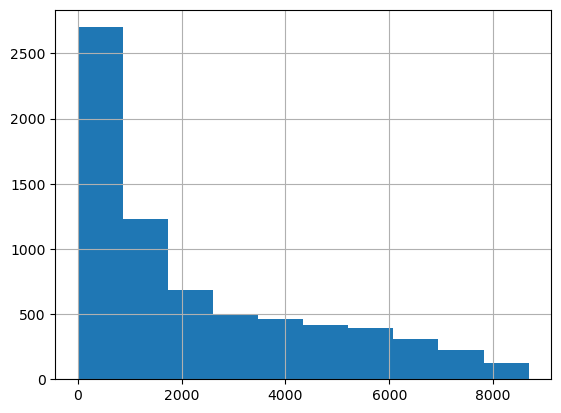

In [28]:
df.total_charges.hist()

<AxesSubplot:>

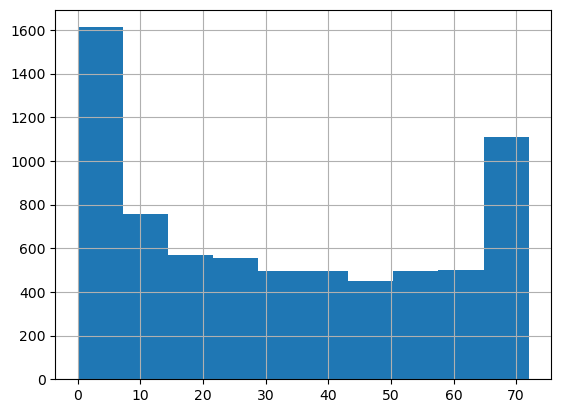

In [29]:
df.tenure.hist()

#### Run stats test

In [30]:
sr, sp = stats.spearmanr(df.tenure, df.total_charges)
sr, sp

(0.8896957900597577, 0.0)

In [31]:
stats.pearsonr(df.tenure, df.total_charges)

PearsonRResult(statistic=0.8261783979502481, pvalue=0.0)

In [32]:
r, p = stats.pearsonr( df.tenure, df.total_charges)
r, p

(0.8261783979502481, 0.0)

In [33]:
eval_Sresult(sr, sp)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.889696
P-value: 0.0


In [34]:
#output results
print('r =', r)
print('p =', p)

r = 0.8261783979502481
p = 0.0


In [35]:
#evaluate p-value
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


    we reject the null hypothesis that says there is no linear relationship between tenure and total charges.

    therefore, we are impling there IS a weak positive linear relationship between tenure and total charges.

    * What happens if you control for phone and internet service?

     * Pearson Correlation Coefficient

         $H_{0}$ : There is no correlation between tenure, monthly charges, phone and internet service.

         $H_{a}$ : There is a correlation between tenure monthly charges, phone and internet service.

In [36]:
query = '''
select cp.monthly_charges, tenure, cp.total_charges, phone_service, internet_service_type_id, internet_service_type
from customer_payments cp
    join customers c using(customer_id)
    join internet_service_types ist using(internet_service_type_id)
'''
df = pd.read_sql(query, url)
df.head()

,monthly_charges,tenure,total_charges,phone_service,internet_service_type_id,internet_service_type
0,65.6,9,593.3,Yes,1,DSL
1,59.9,9,542.4,Yes,1,DSL
2,73.9,4,280.85,Yes,2,Fiber optic
3,98.0,13,1237.85,Yes,2,Fiber optic
4,83.9,3,267.4,Yes,2,Fiber optic


In [37]:
df.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

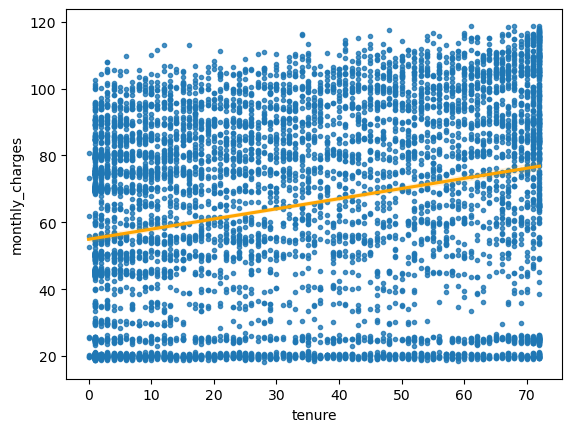

In [38]:
sns.regplot(x='tenure', y = 'monthly_charges', data=df, marker='.', line_kws={'color': 'orange'})
plt.show()

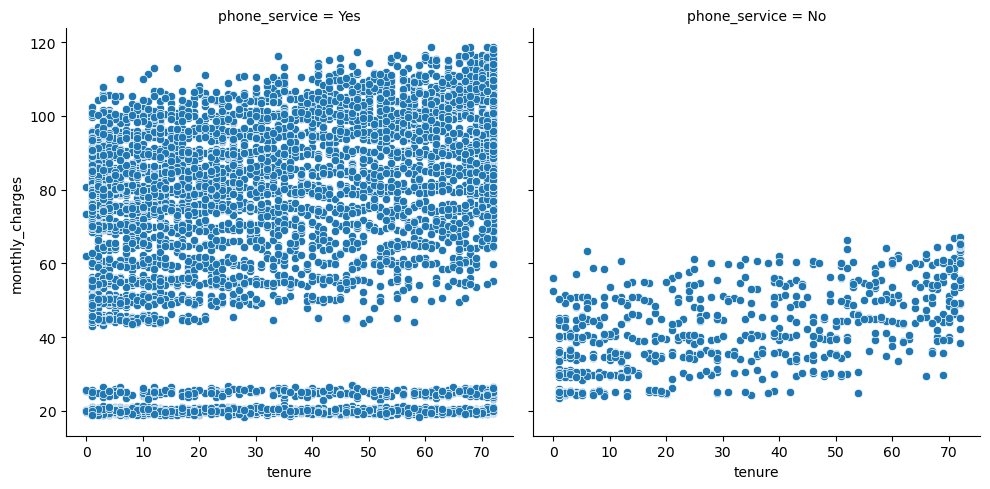

In [39]:
sns.relplot(data=df,  x='tenure', y='monthly_charges', col='phone_service')

In [40]:
#create separate dfs for Yes and No Phone Service customers
yess = df [df.phone_service == 'Yes']
noo = df [df.phone_service == 'No']

In [41]:
r, p = stats.pearsonr(yess.tenure, yess.monthly_charges)

print('Yes')
print('  r =', r)
print('  p =', p)

Yes
  r = 0.24538898585363147
  p = 7.117871077934896e-88


In [42]:
#evaluate p-value
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [43]:
r, p = stats.pearsonr(noo.tenure, noo.monthly_charges)

print('No')
print('  r =', r)
print('  p =', p)

No
  r = 0.5857597986661369
  p = 4.6033703473420516e-64


In [44]:
#evaluate p-value
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


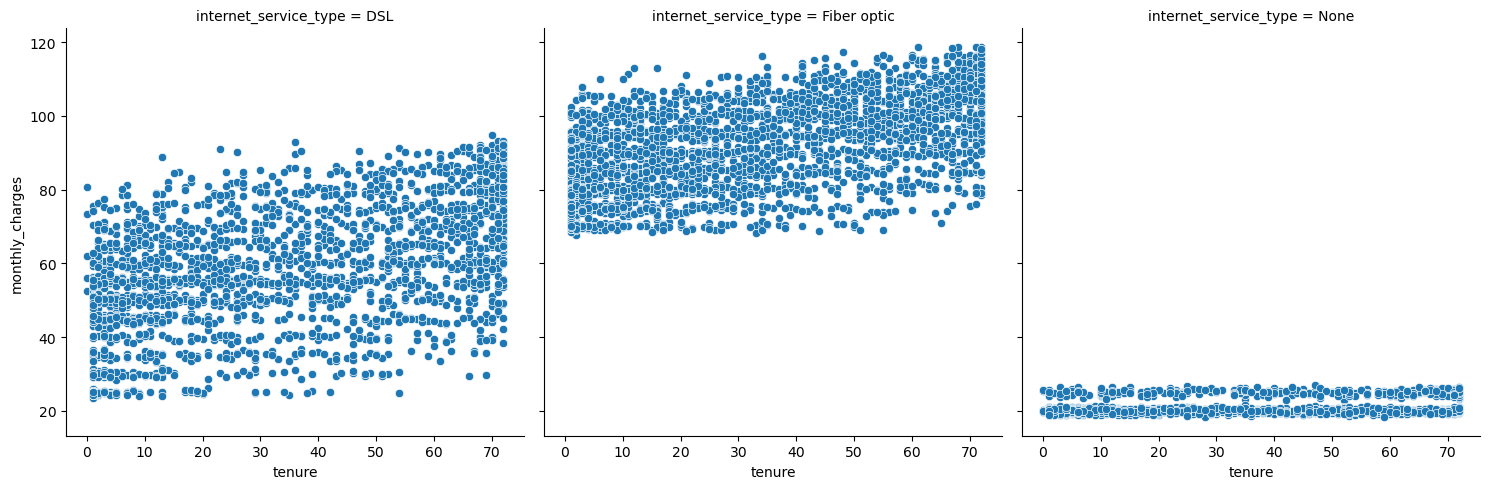

In [45]:
sns.relplot(data=df,  x='tenure', y='monthly_charges', col='internet_service_type')

In [46]:
#create separate dfs for DSL, Fiber Optic and None Internet Service Type
dsl = df [df.internet_service_type == 'DSL']
fiber_optic = df [df.internet_service_type == 'Fiber optic']
none = df [df.internet_service_type == 'None']

In [47]:
r, p = stats.pearsonr(dsl.tenure, dsl.monthly_charges)

print('DSL')
print('  r =', r)
print('  p =', p)

DSL
  r = 0.5172828196602499
  p = 8.360426862271327e-166


In [48]:
#evaluate p-value
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [49]:
r, p = stats.pearsonr(fiber_optic.tenure, fiber_optic.monthly_charges)

print('Fiber Optics')
print('  r =', r)
print('  p =', p)

Fiber Optics
  r = 0.6246206176175593
  p = 0.0


In [50]:
#evaluate p-value
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [51]:
r, p = stats.pearsonr(none.tenure, none.monthly_charges)

print('None')
print('  r =', r)
print('  p =', p)

None
  r = 0.34232562306194525
  p = 3.356186955195866e-43


In [52]:
#evaluate p-value
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


#### Testing having a phone service and DSL

In [53]:
df_phone = df[(df.phone_service == 'Yes') & (df.internet_service_type == 'DSL')][['monthly_charges', 'tenure']]

In [54]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1739 non-null   float64
 1   tenure           1739 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


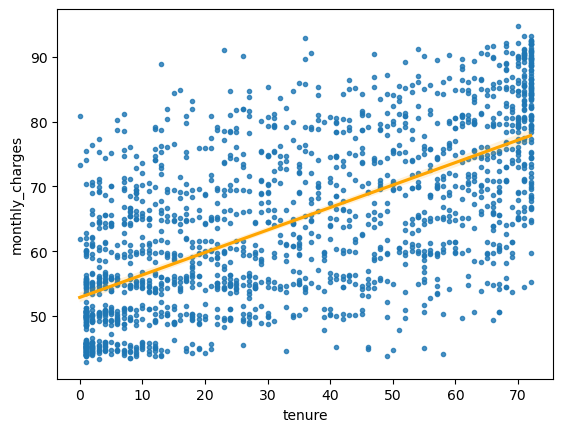

In [55]:
sns.regplot(x='tenure', y = 'monthly_charges', data=df_phone, marker='.', line_kws={'color': 'orange'})
plt.show()

<AxesSubplot:>

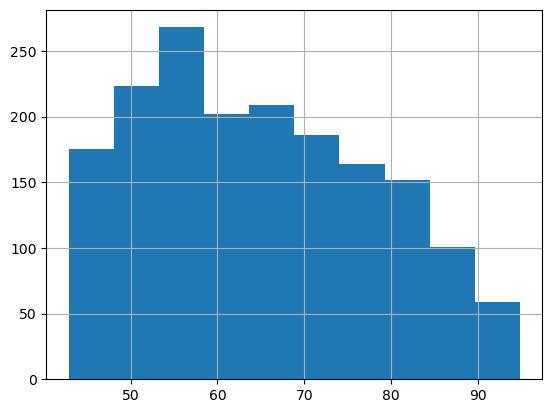

In [56]:
df_phone.monthly_charges.hist()

<AxesSubplot:>

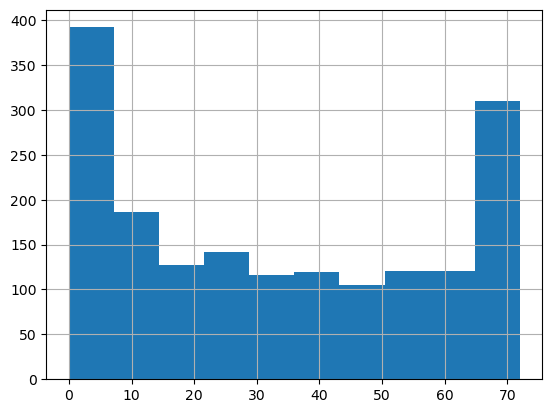

In [57]:
df_phone.tenure.hist()

In [58]:
r, p = stats.pearsonr(df_phone.tenure, df_phone.monthly_charges)
r, p

(0.6553845618157271, 5.676202683632945e-214)

In [59]:
sr, sp = stats.spearmanr(df_phone.tenure, df_phone.monthly_charges)
sr, sp

(0.6644708508462759, 5.423601644635052e-222)

In [60]:
eval_Sresult(r, p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.655385
P-value: 5.676202683632945e-214


    we reject the null hypothesis that says there is no linear relationship between tenure, total charges, phone service and internet service type.

    therefore, we are impling there IS a weak positive linear relationship between tenure, total charges, phone service and internet service type.

## 3. Use the employees database.

In [61]:
url = get_db_url('employees')

query = '''
show tables
'''

In [62]:
pd.read_sql(query, url)

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [63]:
query = '''
select *
from employees
'''
employees = pd.read_sql(query, url)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [64]:
#set sql query
query = '''
select * from (
    select 
        e.emp_no
        ,salary
        ,e.hire_date
        ,case when s.to_date = '9999-01-01' 
            then (select MAX(to_date) from salaries where to_date != '9999-01-01')
            else s.to_date
            end as to_date
        ,row_number() over(partition by e.emp_no, e.hire_date order by s.to_date DESC) rn
    from employees e
    join salaries s on s.emp_no = e.emp_no
 ) a where rn = 1;
        '''

In [65]:
df = pd.read_sql(query, url)

In [66]:
df.head()

,emp_no,salary,hire_date,to_date,rn
0,10001,88958,1986-06-26,2002-08-01,1
1,10002,72527,1985-11-21,2002-08-01,1
2,10003,43311,1986-08-28,2002-08-01,1
3,10004,74057,1986-12-01,2002-08-01,1
4,10005,94692,1989-09-12,2002-08-01,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     300024 non-null  int64 
 1   salary     300024 non-null  int64 
 2   hire_date  300024 non-null  object
 3   to_date    300024 non-null  object
 4   rn         300024 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.4+ MB


    Is there a relationship between how long an employee has been with the company and their salary?

In [68]:
(df.to_date - df.hire_date)

0        5880 days
1        6097 days
2        5817 days
3        5722 days
4        4706 days
            ...   
300019   3488 days
300020   4326 days
300021   5946 days
300022   3214 days
300023   1705 days
Length: 300024, dtype: timedelta64[ns]

In [69]:
(df.to_date - df.hire_date).astype(str).str.split(' ', expand = True)

,0,1
0,5880,days
1,6097,days
2,5817,days
3,5722,days
4,4706,days
...,...,...
300019,3488,days
300020,4326,days
300021,5946,days
300022,3214,days


In [70]:
df['tenure'] = (df.to_date - df.hire_date).astype(str).str.split(' ', expand = True)[0]

In [71]:
df.tenure = df.tenure.astype(int)

In [72]:
tenure_df = df[['tenure', 'salary']]

In [73]:
tenure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   tenure  300024 non-null  int64
 1   salary  300024 non-null  int64
dtypes: int64(2)
memory usage: 4.6 MB


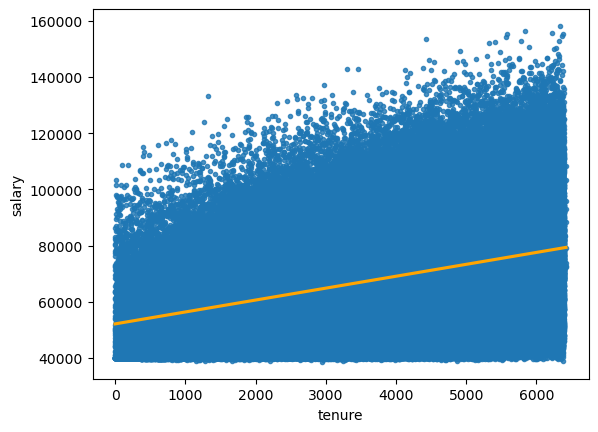

In [74]:
sns.regplot(x='tenure', y = 'salary', data=tenure_df, marker='.', line_kws={'color': 'orange'})
plt.show()

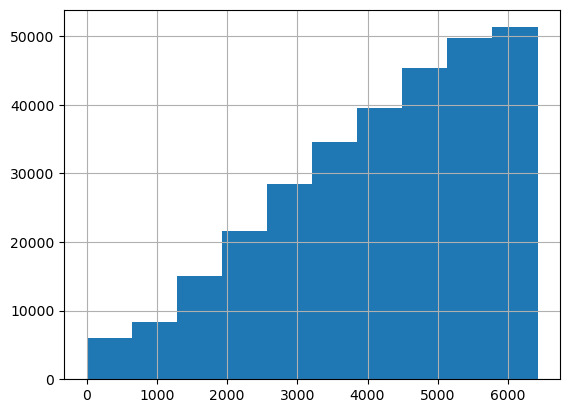

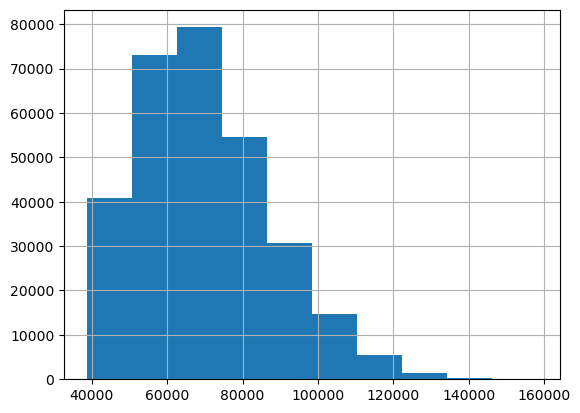

In [75]:
tenure_df.tenure.hist()
plt.show()

tenure_df.salary.hist()
plt.show()

In [76]:
r,p = stats.pearsonr(tenure_df.tenure, tenure_df.salary)
r,p

(0.36928933867674374, 0.0)

In [77]:
sr,sp = stats.spearmanr(tenure_df.tenure, tenure_df.salary)
sr,sp

(0.3752474702658628, 0.0)

In [78]:
eval_Sresult(sr,sp)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.375247
P-value: 0.0


    Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [79]:
query = '''
select 
    t.emp_no, 
    count(t.title) AS num_titles, 
    te.tenure
from titles t
join (select 
        emp_no, 
        datediff(now(), min(from_date)) AS tenure 
      from titles
      group by emp_no
      having max(to_date) = '9999-01-01') te 
on t.emp_no = te.emp_no
group by t.emp_no;        
'''

In [81]:
df = pd.read_sql(query, url)

In [82]:
df = df[['num_titles', 'tenure']]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   num_titles  240124 non-null  int64
 1   tenure      240124 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


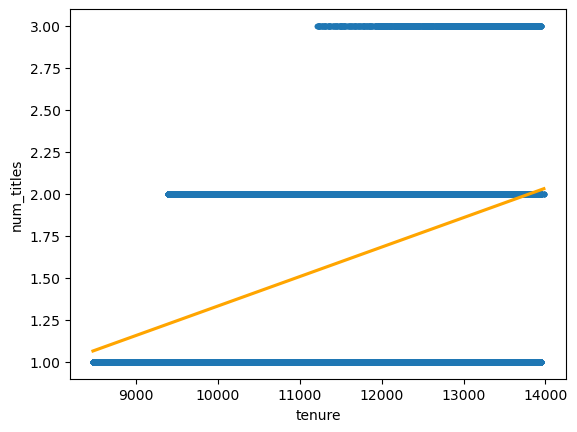

In [84]:
sns.regplot(x='tenure', y = 'num_titles', data=df, marker='.', line_kws={'color': 'orange'})
plt.show()

In [85]:
stats.levene(df.num_titles, df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [86]:
df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

In [87]:
stats.kruskal(df.num_titles, df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

<AxesSubplot:title={'center':'tenure'}, xlabel='num_titles'>

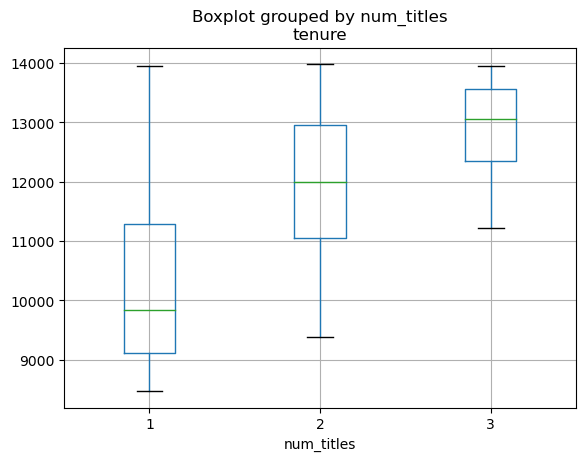

In [88]:
df.boxplot('tenure', by='num_titles')

## 4. Use the sleepstudy data.

In [89]:
df = data('sleepstudy')

In [90]:
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [91]:
react_df = df[['Reaction','Days']]

In [92]:
react_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [93]:
react_df.head()

,Reaction,Days
1,249.5600,0
2,258.7047,1
3,250.8006,2
4,321.4398,3
5,356.8519,4


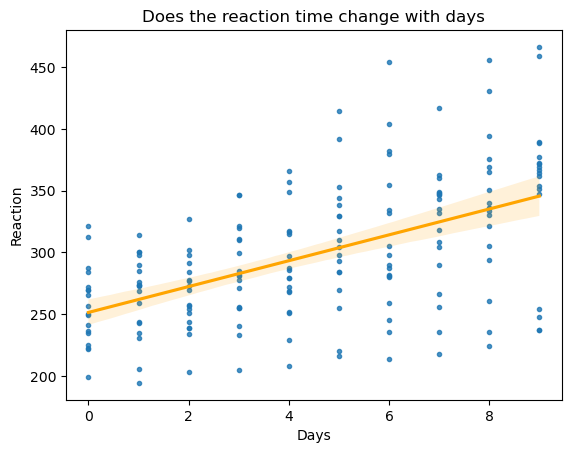

In [94]:
sns.regplot(data=react_df, x='Days', y='Reaction', marker='.', line_kws=({'color': 'orange'}))

plt.title('Does the reaction time change with days')
plt.show()

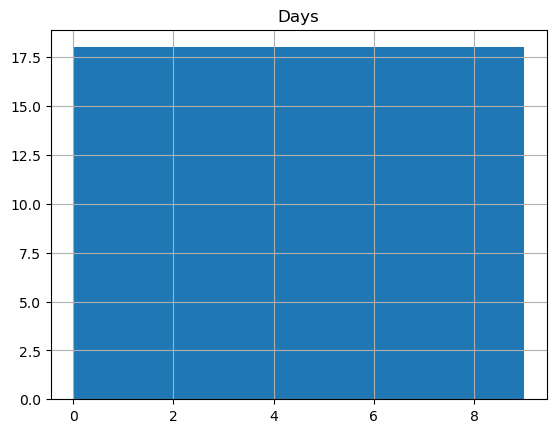

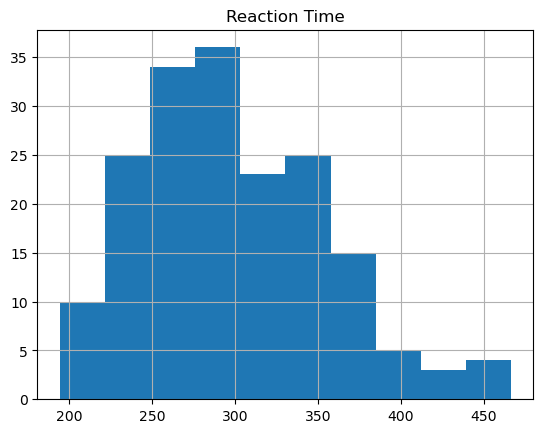

In [95]:
react_df.Days.hist()
plt.title('Days')
plt.show()

react_df.Reaction.hist()
plt.title('Reaction Time')
plt.show()

In [96]:
r, p = stats.spearmanr(react_df.Days, react_df.Reaction)
r, p

(0.5228138502259547, 5.132878057706873e-14)

In [97]:
eval_Sresult(r, p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.522814
P-value: 5.132878057706873e-14


# Comparison of Groups

Answer with the type of stats test you would use (assume normal distribution):

Do students get better test grades if they have a rubber duck on their desk?

- Independent Var.1 = if they have a rubber duck on their desk
- Dependant Var.2 = test grades (Continues)
- Two Sample t-test

Does smoking affect when or not someone has lung cancer?

- Ind Var.1 = smoking (discrete)
- Dep Var.2 = lung cancer (discrete)
- Chi-square

Is gender **independent** of a person’s blood type?

- Ind Var.1 = gender (discrete)
- Dep Var.2 = blood type (discrete)
- Chi-square

A farming company wants to know if a new fertilizer has improved crop yield or not

- Ind Var.1 = old or new fertilizer
- Dep Var.2 = crop yield
- independent T-Test

Does the length of time of the lecture correlate with a students grade?

- Ind Var.1 = lenght of time of the lecture (continues)
- Dep Var.2 = students grade (continues)
- Pearson Correlation Coefficient

Do people with dogs live in apartments more than people with cats?

- Dep Var.1 = other residence
- Dep Var.2 = apartments
- Ind Var.3 = dogs
- Ind Var.4 = cats
- Chi-square

### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                            Codeup Student	Not Codeup Student
            Uses a Macbook	      49	           20
     Doesn't Use A Macbook	      1	            30

        $H_{0}$ : There is no association betweeen being a codeup student and using a macbook.

        $H_{a}$ : There is a association betweeen being a codeup student and using a macbook.

In [98]:
a = .05

In [99]:
observed = [[49, 20],[1,30]]
observed

[[49, 20], [1, 30]]

In [100]:
observed = pd.DataFrame(observed)

In [101]:
chi2, p, degt, expected = stats.chi2_contingency(observed)

In [102]:
def chi2_test(table, flag=False):
    chi2, p, degt, expected = stats.chi2_contingency(observed)
    print('Observed')
    print(observed.values)
    print('\Expected')
    print(expected.astype(int))
    print('\n-----')
    print(f'chi-2 = {chi2:.4f}')
    print(f'p       ={p}')
    if flag:
        return chi2, p, degt, expected
    else:
        return

In [103]:
chi2_test(observed, flag = True)

Observed
[[49 20]
 [ 1 30]]
\Expected
[[34 34]
 [15 15]]

-----
chi-2 = 36.6526
p       =1.4116760526193828e-09


(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [105]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### 3. Choose another 2 categorical variables from the mpg dataset and perform a $\chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [106]:
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


        $H_{0}$ : There is no association betweeen the car year and cylinder.

        $H_{a}$ : There is a association betweeen the car year and cylinder.

In [108]:
df.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [109]:
df.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [110]:
observed = pd.crosstab(df.year, df.cyl)
observed

cyl,4,5,6,8
year,,,,
1999,45,0,45,27
2008,36,4,34,43


In [111]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [112]:
chi2_test(observed, flag = True)

Observed
[[45  0 45 27]
 [36  4 34 43]]
\Expected
[[40  2 39 35]
 [40  2 39 35]]

-----
chi-2 = 10.1888
p       =0.01702768537665195


(10.18878842676311,
 0.01702768537665195,
 3,
 array([[40.5,  2. , 39.5, 35. ],
        [40.5,  2. , 39.5, 35. ]]))

In [114]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### 4. Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


        $H_{0}$ : There is no association betweeen gender and wheater an employee works in sales or marketing.

        $H_{a}$ : There is a association betweeen tgender and wheater an employee works in sales or marketing.

In [115]:
url = get_db_url('employees')

query = ''' 
        select emp_no, gender, dept_name
        from employees
            join dept_emp
                using (emp_no)
            join departments
                using (dept_no)
        where to_date = '9999-01-01'
        and dept_name in ('Marketing','Sales')
        '''

In [118]:
df = pd.read_sql(query, url)
df.head()

,emp_no,gender,dept_name
0,10017,F,Marketing
1,10058,M,Marketing
2,10140,F,Marketing
3,10228,F,Marketing
4,10239,F,Marketing


In [119]:
df.gender.value_counts()

M    31680
F    20863
Name: gender, dtype: int64

In [120]:
df.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [121]:
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [122]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [123]:
chi2_test(observed, flag = True)

Observed
[[ 5864 14999]
 [ 8978 22702]]
\Expected
[[ 5893 14969]
 [ 8948 22731]]

-----
chi-2 = 0.3240
p       =0.5691938610810126


(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [125]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


Is an employee's gender independent of whether or not they are or have been a manager?

In [126]:
query = '''
select emp_no, gender, dept_no
from employees
    left join dept_manager
        using(emp_no)
'''

In [127]:
df = pd.read_sql(query, url)
df.head()

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int64 
 1   gender   300024 non-null  object
 2   dept_no  24 non-null      object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [129]:
df.dept_no.value_counts(dropna=False)

None    300000
d004         4
d006         4
d009         4
d001         2
d002         2
d003         2
d005         2
d007         2
d008         2
Name: dept_no, dtype: int64

In [130]:
df.dept_no = df.dept_no.fillna('not manager')

In [131]:
df.dept_no.value_counts()

not manager    300000
d004                4
d006                4
d009                4
d001                2
d002                2
d003                2
d005                2
d007                2
d008                2
Name: dept_no, dtype: int64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int64 
 1   gender   300024 non-null  object
 2   dept_no  300024 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [133]:
df.dept_no.unique()

array(['not manager', 'd001', 'd002', 'd003', 'd004', 'd005', 'd006',
       'd007', 'd008', 'd009'], dtype=object)

In [134]:
df.dept_no = np.where(df.dept_no != 'not manager', 'manager', 'not manager')

In [135]:
df.dept_no.unique()

array(['not manager', 'manager'], dtype=object)

In [136]:
df.dept_no.value_counts()

not manager    300000
manager            24
Name: dept_no, dtype: int64

In [137]:
observed = pd.crosstab(df.gender, df.dept_no)

In [138]:
chi2, p, degt, expected = stats.chi2_contingency(observed)

In [139]:
chi2_test(observed, flag = True)

Observed
[[    13 120038]
 [    11 179962]]
\Expected
[[     9 120041]
 [    14 179958]]

-----
chi-2 = 1.4567
p       =0.22745818732810363


(1.4566857643547197,
 0.22745818732810363,
 1,
 array([[9.60331174e+00, 1.20041397e+05],
        [1.43966883e+01, 1.79958603e+05]]))

In [141]:
if p < a:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

we fail to reject the null hypothesis


In [142]:
def chi2_test(table, flag=False):
    chi2, p, degt, expected = stats.chi2_contingency(observed)
    print('Observed')
    print(observed.values)
    print('\Expected')
    print(expected.astype(int))
    print('\n-----')
    print(f'chi-2 = {chi2:.4f}')
    print(f'p       ={p}')
    if flag:
        return chi2, p, degt, expected
    else:
        return

In [143]:
chi2_test(observed, flag = True)

Observed
[[    13 120038]
 [    11 179962]]
\Expected
[[     9 120041]
 [    14 179958]]

-----
chi-2 = 1.4567
p       =0.22745818732810363


(1.4566857643547197,
 0.22745818732810363,
 1,
 array([[9.60331174e+00, 1.20041397e+05],
        [1.43966883e+01, 1.79958603e+05]]))

# Study Notes

## Types of Distributions
   **Uniform distributions:** have equal likelihoods among all outcomes, like a fair coin.
           The uniform distribution can be used to model events where the outcome is discrete and each outcome has an  equally likely chance of happening.

            An example of an event that can be modeled with the uniform distribution is the outcome of rolling a 6-               sided die.

            Since the uniform distribution is conceptually simple, we will use it as an example of how to work with               different distributions in scipy.
            
   **Binomial distributions:** are all about determining a binary outcome of an event. Success/failure, for example.
   
            The binomial distribution lets us model the number of successes after a number of trials, given a certain probability of success. The classic example of this is the number of heads you would expect to see after flipping a coin a certain number of times.

            A binomial distribution is defined by a number of trials, and a probability of success. These two pieces of information are what we need in order to model a problem with the binomial distribution.

            The binomial distribution assumes that each trial is independent of the others.
    
   **Normal distributions:** model a continuous random variable.
    
   **Poisson distributions:** model a certain amount of events occuring over a time interval
    
         * The poisson distribution lets us model a situation where a certain number of events happen over a specified time interval1. The number of events that happen is a discrete measure, and this distribution can tell us the likelihood of a certain number of events occuring over the time period.

         * The poisson distribution assumes that the events are indpendent of each other and independent of the time since the last event. We must also know the average rate to use a poisson distribution.


    ariance equals false if lavenes test is below .05
    
    Lavenes test matters for 2 data sets parametric and non parametric
    
    If variance less than .05 you have to use the non parametric test for multiple data frames ttest(df, df, df)
    
    For the type of test I should use
        Discreet discreet use chi2
        Continuous continuous correlation
        Discreet continuous use ttest
        3 continuous use anova or non parametric

### One Sample T-Test
$H_{0}$  $\mu{obs}$ = $\mu{th}$ Null Hypothesis	                                            

$H_{a}$ $\mu{obs}$ != $\mu{th}$ **Alternative Hypothesis (2-tail, significantly different)	

$H_{a}$  $\mu{obs}$ < $\mu{th}$ **Alternative Hypothesis (1-tail, significantly smaller)

$H_{a}$  $\mu{obs}$ > $\mu{th}$ **Alternative Hypothesis (1-tail, significantly larger)

   Is the **average** of a sample significantly different from a known or hypothesized value? 
   
   Example: Is the average height of students in this class significantly different from the average height of all students in the school?


### Independent T-Test (aka Two_Sample T-Test)
$H_{0}$   $\mu{a}$ == $\mu{b}$ Null Hypothesis	                                            

$H_{a}$   $\mu{a}$ != $\mu{b}$ Alternative Hypothesis (2-tail, significantly different)	

$H_{a}$   $\mu{a}$ < $\mu{b}$ **Alternative Hypothesis (1-tail, significantly smaller THAN B)

$H_{a}$   $\mu{a}$ > $\mu{b}$ **Alternative Hypothesis (1-tail, significantly larger THAN B)

   Are the **means** of **two independent samples** significantly different
   
   Example: Are the test scores of boys and girls in this class significantly different?

   #### I believe customers who churn are charged more (monthly average) than customers who don't churn. Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn?

    We will use a 1-tailed ("significantly higher"), 1-sample (comparing 1 group to the average) t-test.

        $H_{0}$ : Mean of monthly charges of churned customers <= Mean of monthly charges of customers who haven't churned

        $H_{a}$ : Mean of monthly charges of churned customers > Mean of monthly charges of customers who haven't churned
    
    
   #### Are charges of customers who churn significantly different than those who do not churn?

        $H_{0}$ : charges of customers who churn equals that of those who don't churn.

        $H_{a}$ : charges of customers who churn is not equal to that of those who don't churn.
        
   #### Are charges of customers who churn significantly less than those who do not churn?

        $H_{0}$ : charges of customers who churn equals or greater than that of those who don't churn.

        $H_{a}$ : charges of customers who churn is less than that of those who don't churn.
        
        


### ANOVA Analysis of Variance
$H_{0}$   $\mu{a}$ == $\mu{b}$ == $\mu{c}$ Null Hypothesis	                                            

$H_{a}$   $\mu{a}$ != $\mu{b}$ != $\mu{c}$ Alternative Hypothesis (2-tail, significantly different)

   Are the **means** of **two or more groups** significantly different
    
    Example: Are the test scores of students in three different schools significantly different?


  #### Is the sepal length significantly different across the different species of iris?

        $H_{0}$ : population means of the sepal length for the three species, versicolor, virginica & setosa, are all equal.

        $H_{a}$ : population means of the sepal length for the three species, versicolor, virginica & setosa, are NOT all equal.
        
   
        $H_{0}$ : hp is the same across all origins

        $H_{a}$ : hp is not the same across all origins
        

### Pearson Correlation Coefficient

Correlation tests are used to check if **two samples are related**. They are often used for feature selection and multivariate analysis in data preprocessing and exploration.

   Is there a linear relationship between **two continuous variables** 
   Example: Is there a correlation between the height and weight of students in this class?

When performing a correlation test, our null hypothesis is that there is no linear correlation between the two variables.

        $H_{0}$ : There is no linear correlation between the number of hours studied and the score on the exam.

        $H_{a}$ : There is a linear relationship between the number of hours studied and the score on the exam.
        
        
### Comparing Group Membership
The $\chi^2$ Test

The $\chi^2$ ('k¯i') can be also be used in several other ways, but we will use what is referred to as the contingency table test, which lets us test the hypothesis that one group is independent of another.

The $\chi^2$ test can be used to **compare two categorical variables** and helps us answer questions like:

    Is whether or not a customer churns independent of their subscription plan?
    Are doctors less likely to smoke?
    Does playing on the home field give a soccer team an advantage?
    
   Are **two categorical variables** related or independent?
    
    Example: Is there a relationship between the gender and favorite color of students in this class?
    
    Example:
    We will investigate the question of whether the cars drive is independent of transmission type.

        $H_{0}$ : (Null Hypothesis): drive is independent of transmission type.

        $H_{a}$ : (Alternative Hypothesis): drive is dependent on transmission type.



### Uniform Distribution

In [144]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from scipy import stats

np.random.seed(123)

from pydataset import data

# from env import host, user, password

# from wrangle_telco import wrangle_telco
# from explore import correlation_exploration

In [145]:
low = 1
high = 10
size = 100

In [146]:
uniform_distribution = stats.randint(low, high, size)

In [147]:
uniform_distribution.rvs()

103

In [148]:
uniform_distribution.rvs(10)

array([103, 107, 102, 104, 107, 102, 101, 102, 101, 101])

In [149]:
uniform_distribution.rvs(size = (3, 4))

array([[104, 105, 101, 101],
       [105, 102, 108, 104],
       [103, 105, 108, 103]])

### Binomial Distribution

In [150]:
# n = trials (number of flips)
# p = p(success)
# binomial_distribution = stats.binom(n, p)


# Example:

# The probability of flipping heads (a pre-defined success) exactly 6 times in 35 flips (trials).

binomial_distribution = stats.binom(35, .167)

In [151]:
binomial_distribution.pmf(6) # 6 times

0.17594024783467105

### Normal Distribution

In [152]:
mean = 0
standard_deviation = 1

In [153]:
normal_distribution = stats.norm(mean, standard_deviation)
normal_distribution

In [154]:
random_vars = normal_distribution.rvs(10)
print(random_vars)

[ 2.20742744  0.52274247  0.46564476  0.72491523  1.49582653  0.74658059
 -1.10098526 -1.4103012  -0.74765132 -0.98486761]


### Poisson Distribution

In [155]:
# poisson_distribution = stats.poisson(average rate)

poisson_distribution = stats.poisson(2)
random_vars = poisson_distribution.rvs(10)
print(random_vars)

[1 2 1 4 0 1 2 3 3 1]


### PDF/PMF

In [156]:
# distribution.pdf(probability/continuous)
normal_distribution = stats.norm(0, 1)
pdf_value = normal_distribution.pdf(0)
print(pdf_value)

0.3989422804014327


In [157]:
# distribution.pmf(value/discrete)
poisson_distribution = stats.poisson(2)
pmf_value = poisson_distribution.pmf(3)
print(pmf_value)


0.18044704431548356


### CDF/PPF

In [158]:
# distribution.cdf(value/discrete)
normal_distribution = stats.norm(0, 1)
cdf_value = normal_distribution.cdf(1)
print(cdf_value)

0.8413447460685429


In [159]:
# distribution.ppf(probability/continuous)
normal_distribution = stats.norm(0, 1)
ppf_value = normal_distribution.ppf(0.95)
print(ppf_value)

1.6448536269514722


### SF/ISF

In [160]:
# distribution.sf(value/discrete)
poisson_distribution = stats.poisson(3) # 3 is the mean
sf_value = poisson_distribution.sf(5) # the SF of this distribution at the value 5
print(sf_value)

0.08391794203130347


In [161]:
# distribution.isf(probability/continuous)
normal_distribution = stats.norm(0, 1) # an array of probabilities between 0 and 1
isf_value = normal_distribution.isf(0.05) # the ISF of this distribution at the probability .05
print(isf_value)

1.6448536269514729


In [162]:
n_trail = 618
p_success = .1

stats.binom(n_trail, p_success).sf(69)

0.15107528710209764

In [163]:
mean = 40
sd = 15

In [164]:
stats.binom(mean, sd).cdf(50)

nan